## Question 1 - Multinomial Sampling
***

In [2]:
import random


def _sample_multinomial():
    boundaries = {
        0.2: "Movies",
        0.6: "COMP-551",
        0.7: "Playing",
        1.0: "Studying"
    }

    generated = random.random()
    boundary_list = list(boundaries.keys())
    for index, g in enumerate(boundary_list):
        if index == 0:
            if g > generated > 0:
                return boundaries[g]
        else:
            if g > generated > boundary_list[index - 1]:
                return boundaries[g]


def repeated_samples(num: int):

    results = {
        "Movies": 0,
        "COMP-551": 0,
        "Playing": 0,
        "Studying": 0
    }
    for i in range(num):
        results[_sample_multinomial()] += 1

    fraction_results = {
    }

    for r in results:
        fraction_results[r] = results[r] / num

    return fraction_results


if __name__ == '__main__':
    probabilities = {
        "Movies": 0.2,
        "COMP-551": 0.4,
        "Playing": 0.1,
        "Studying": 0.3
    }
    print("Sampling 100 times:")
    sum=0
    for k, v in repeated_samples(100).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100*((v-probabilities[k])/probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))
    print("\nSampling 1000 times: ")
    for k, v in repeated_samples(1000).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100 * ((v - probabilities[k]) / probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))

Sampling 100 times:
 Movies : 0.10 ( -50.00 %)
 COMP-551 : 0.34 ( -15.00 %)
 Playing : 0.13 ( 30.00 %)
 Studying : 0.43 ( 43.33 %)
Average Error: 2.08%

Sampling 1000 times: 
 Movies : 0.19 ( -5.50 %)
 COMP-551 : 0.37 ( -7.75 %)
 Playing : 0.12 ( 20.00 %)
 Studying : 0.32 ( 7.33 %)
Average Error: 5.60%


## Question 2 - Model Selection


### Question 2.1 - No Regularization:

**Visualizing without Validation Predictions:**

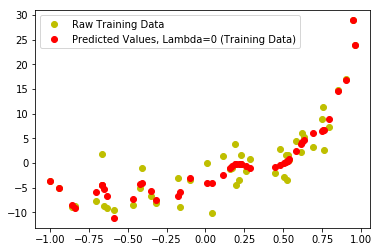

Training Data MSE:
6.4750601542578305
Validation Data MSE:
1415.7667845050064


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 0, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

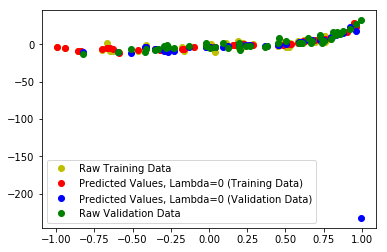

Training Data MSE:
6.4750601542578305
Validation Data MSE:
1415.7667845050064


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 0, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)", "Predicted Values, Lambda=0 (Validation Data)", "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))

### Question 2.2 - L2 Regularization:
**Without validation predictions:**

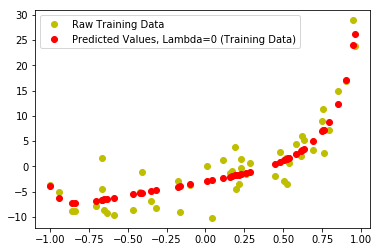

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858


In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 1, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

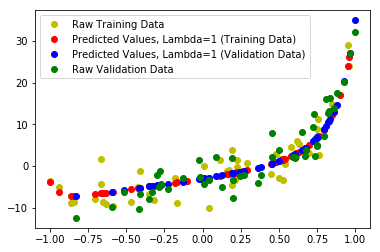

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 1, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=1 (Training Data)", "Predicted Values, Lambda=1 (Validation Data)", "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



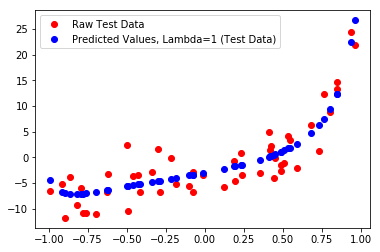

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858
Testing Data MSE:
128.56429805939945


In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    w_train = computeparametres(x_train, y_train, 1, 20)

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')


    x_test, y_test = read_file('data/Dataset_1_test.csv')
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, y_predict_set(w_train, exponential(x_test, 20)), 'bo')
    plt.legend(["Raw Test Data", "Predicted Values, Lambda=1 (Test Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))
    print("Testing Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_test))



## Question 3
### Question 3-1: SGD Plots
**Scroll down for Plot**

SCROLL DOWN FOR PLOT
MSE for Epoch #1: 36.47257826801104
MSE for Epoch #2: 36.43661483833592
MSE for Epoch #3: 36.40068704688039
MSE for Epoch #4: 36.36479490075705
MSE for Epoch #5: 36.328938300661264
MSE for Epoch #6: 36.29311723445252
MSE for Epoch #7: 36.25733167467204
MSE for Epoch #8: 36.221581553500215
MSE for Epoch #9: 36.1858668655618
MSE for Epoch #10: 36.15018757908593
MSE for Epoch #11: 36.11454368805133
MSE for Epoch #12: 36.07893506213485
MSE for Epoch #13: 36.04336174219966
MSE for Epoch #14: 36.0078236849748
MSE for Epoch #15: 35.972320874084076
MSE for Epoch #16: 35.936853194915805
MSE for Epoch #17: 35.90142069855441
MSE for Epoch #18: 35.866023282038704
MSE for Epoch #19: 35.83066099738976
MSE for Epoch #20: 35.79533374347216
MSE for Epoch #21: 35.76004150836451
MSE for Epoch #22: 35.724784222114934
MSE for Epoch #23: 35.68956188558673
MSE for Epoch #24: 35.654374442861865
MSE for Epoch #25: 35.61922185672589
MSE for Epoch #26: 35.58410413045839
MSE for Epoch #27: 35

MSE for Epoch #250: 28.533505319909494
MSE for Epoch #251: 28.505409062368116
MSE for Epoch #252: 28.477340633275794
MSE for Epoch #253: 28.449300016362766
MSE for Epoch #254: 28.421287206611463
MSE for Epoch #255: 28.393302145850257
MSE for Epoch #256: 28.36534479898883
MSE for Epoch #257: 28.337415157701695
MSE for Epoch #258: 28.309513197286684
MSE for Epoch #259: 28.28163884979325
MSE for Epoch #260: 28.253792134479923
MSE for Epoch #261: 28.22597300166874
MSE for Epoch #262: 28.19818144486486
MSE for Epoch #263: 28.170417430817494
MSE for Epoch #264: 28.142680930589222
MSE for Epoch #265: 28.114971918187145
MSE for Epoch #266: 28.087290373521526
MSE for Epoch #267: 28.059636225152566
MSE for Epoch #268: 28.032009497408403
MSE for Epoch #269: 28.004410082012512
MSE for Epoch #270: 27.97683801697574
MSE for Epoch #271: 27.9492933138171
MSE for Epoch #272: 27.921775869542916
MSE for Epoch #273: 27.894285713879352
MSE for Epoch #274: 27.866822782355356
MSE for Epoch #275: 27.839387098

MSE for Epoch #502: 22.265185229369873
MSE for Epoch #503: 22.243299064759526
MSE for Epoch #504: 22.22143457114344
MSE for Epoch #505: 22.19959172777645
MSE for Epoch #506: 22.177770530339487
MSE for Epoch #507: 22.155970952257412
MSE for Epoch #508: 22.134192974772926
MSE for Epoch #509: 22.112436573506194
MSE for Epoch #510: 22.09070169033035
MSE for Epoch #511: 22.068988338664752
MSE for Epoch #512: 22.047296503537282
MSE for Epoch #513: 22.0256261490837
MSE for Epoch #514: 22.003977257028595
MSE for Epoch #515: 21.982349845473024
MSE for Epoch #516: 21.9607438285403
MSE for Epoch #517: 21.939159211780897
MSE for Epoch #518: 21.91759600192785
MSE for Epoch #519: 21.896054150676637
MSE for Epoch #520: 21.874533626206407
MSE for Epoch #521: 21.853034427887643
MSE for Epoch #522: 21.831556506103414
MSE for Epoch #523: 21.810099867087324
MSE for Epoch #524: 21.788664483898174
MSE for Epoch #525: 21.767250326966067
MSE for Epoch #526: 21.745857386626312
MSE for Epoch #527: 21.7244856312

MSE for Epoch #751: 17.433441885292158
MSE for Epoch #752: 17.416341266933188
MSE for Epoch #753: 17.39925758773428
MSE for Epoch #754: 17.38219083480259
MSE for Epoch #755: 17.365140980098055
MSE for Epoch #756: 17.348108008254947
MSE for Epoch #757: 17.33109189296428
MSE for Epoch #758: 17.314092658861597
MSE for Epoch #759: 17.297110224423577
MSE for Epoch #760: 17.280144615676985
MSE for Epoch #761: 17.263195825257405
MSE for Epoch #762: 17.246263793788994
MSE for Epoch #763: 17.229348533730242
MSE for Epoch #764: 17.212450019874073
MSE for Epoch #765: 17.19556826309603
MSE for Epoch #766: 17.17870320433358
MSE for Epoch #767: 17.16185484556074
MSE for Epoch #768: 17.14502318291086
MSE for Epoch #769: 17.128208190539482
MSE for Epoch #770: 17.111409840023086
MSE for Epoch #771: 17.09462812510789
MSE for Epoch #772: 17.07786303521813
MSE for Epoch #773: 17.061114521988912
MSE for Epoch #774: 17.04438262300083
MSE for Epoch #775: 17.02766731484103
MSE for Epoch #776: 17.0109685122409

MSE for Epoch #996: 13.711641655310215
MSE for Epoch #997: 13.698226143857932
MSE for Epoch #998: 13.684823918697417
MSE for Epoch #999: 13.671434954735185
MSE for Epoch #1000: 13.658059241938213
MSE for Epoch #1001: 13.644696783253844
MSE for Epoch #1002: 13.631347564435844
MSE for Epoch #1003: 13.618011550962528
MSE for Epoch #1004: 13.60468873036523
MSE for Epoch #1005: 13.591379117811384
MSE for Epoch #1006: 13.57808266370162
MSE for Epoch #1007: 13.564799354620705
MSE for Epoch #1008: 13.551529216931463
MSE for Epoch #1009: 13.53827219366991
MSE for Epoch #1010: 13.525028319729493
MSE for Epoch #1011: 13.511797551096404
MSE for Epoch #1012: 13.49857988093626
MSE for Epoch #1013: 13.48537530864582
MSE for Epoch #1014: 13.472183802795096
MSE for Epoch #1015: 13.459005360639088
MSE for Epoch #1016: 13.445839951353523
MSE for Epoch #1017: 13.432687576587334
MSE for Epoch #1018: 13.419548213393371
MSE for Epoch #1019: 13.406421862294655
MSE for Epoch #1020: 13.393308500427874
MSE for E

MSE for Epoch #1222: 10.993734053459553
MSE for Epoch #1223: 10.983008767048341
MSE for Epoch #1224: 10.97229409838598
MSE for Epoch #1225: 10.961590016512943
MSE for Epoch #1226: 10.950896544109389
MSE for Epoch #1227: 10.940213659684202
MSE for Epoch #1228: 10.92954134258577
MSE for Epoch #1229: 10.918879576599757
MSE for Epoch #1230: 10.908228354024665
MSE for Epoch #1231: 10.897587695414174
MSE for Epoch #1232: 10.886957546431436
MSE for Epoch #1233: 10.876337919517658
MSE for Epoch #1234: 10.865728814468671
MSE for Epoch #1235: 10.85513020485086
MSE for Epoch #1236: 10.844542063585203
MSE for Epoch #1237: 10.83396442070407
MSE for Epoch #1238: 10.82339724965222
MSE for Epoch #1239: 10.812840516695255
MSE for Epoch #1240: 10.80229425308986
MSE for Epoch #1241: 10.79175842026143
MSE for Epoch #1242: 10.781233022691296
MSE for Epoch #1243: 10.770718026657313
MSE for Epoch #1244: 10.760213446706473
MSE for Epoch #1245: 10.749719257142837
MSE for Epoch #1246: 10.739235453164788
MSE for

MSE for Epoch #1472: 8.617285528625414
MSE for Epoch #1473: 8.60891157807137
MSE for Epoch #1474: 8.600545913696646
MSE for Epoch #1475: 8.592188522869339
MSE for Epoch #1476: 8.58383938977881
MSE for Epoch #1477: 8.575498509922696
MSE for Epoch #1478: 8.567165886405952
MSE for Epoch #1479: 8.55884152892887
MSE for Epoch #1480: 8.550525409108252
MSE for Epoch #1481: 8.54221750946449
MSE for Epoch #1482: 8.533917833277828
MSE for Epoch #1483: 8.525626349915296
MSE for Epoch #1484: 8.517343067050135
MSE for Epoch #1485: 8.509067990976753
MSE for Epoch #1486: 8.500801075771244
MSE for Epoch #1487: 8.492542348682006
MSE for Epoch #1488: 8.484291788148699
MSE for Epoch #1489: 8.47604940347355
MSE for Epoch #1490: 8.467815162075922
MSE for Epoch #1491: 8.459589067873821
MSE for Epoch #1492: 8.451371105949349
MSE for Epoch #1493: 8.44316127055058
MSE for Epoch #1494: 8.434959570706566
MSE for Epoch #1495: 8.426765978770486
MSE for Epoch #1496: 8.41858049201631
MSE for Epoch #1497: 8.410403096

MSE for Epoch #1723: 6.755194906067683
MSE for Epoch #1724: 6.748662519048463
MSE for Epoch #1725: 6.7421365853253485
MSE for Epoch #1726: 6.7356171120642525
MSE for Epoch #1727: 6.72910407298893
MSE for Epoch #1728: 6.722597473541538
MSE for Epoch #1729: 6.716097309009147
MSE for Epoch #1730: 6.709603563522333
MSE for Epoch #1731: 6.7031162301314025
MSE for Epoch #1732: 6.696635324790017
MSE for Epoch #1733: 6.690160836150163
MSE for Epoch #1734: 6.683692747117017
MSE for Epoch #1735: 6.677231058804185
MSE for Epoch #1736: 6.670775739982821
MSE for Epoch #1737: 6.664326822726542
MSE for Epoch #1738: 6.6578842726537015
MSE for Epoch #1739: 6.651448091426654
MSE for Epoch #1740: 6.6450182657873755
MSE for Epoch #1741: 6.638594797562276
MSE for Epoch #1742: 6.632177675759973
MSE for Epoch #1743: 6.625766911569169
MSE for Epoch #1744: 6.619362495926915
MSE for Epoch #1745: 6.61296440416779
MSE for Epoch #1746: 6.6065726293180935
MSE for Epoch #1747: 6.600187182264116
MSE for Epoch #1748: 

MSE for Epoch #1972: 5.31272387370085
MSE for Epoch #1973: 5.307617291395791
MSE for Epoch #1974: 5.302515756134912
MSE for Epoch #1975: 5.297419256278363
MSE for Epoch #1976: 5.292327800637378
MSE for Epoch #1977: 5.287241372162688
MSE for Epoch #1978: 5.282159961575116
MSE for Epoch #1979: 5.27708358185816
MSE for Epoch #1980: 5.272012215711086
MSE for Epoch #1981: 5.266945839766001
MSE for Epoch #1982: 5.261884493912933
MSE for Epoch #1983: 5.256828133553953
MSE for Epoch #1984: 5.251776768297201
MSE for Epoch #1985: 5.246730406110163
MSE for Epoch #1986: 5.241689030260954
MSE for Epoch #1987: 5.236652651628482
MSE for Epoch #1988: 5.231621234332494
MSE for Epoch #1989: 5.226594793935642
MSE for Epoch #1990: 5.221573308104631
MSE for Epoch #1991: 5.216556787011459
MSE for Epoch #1992: 5.211545226066599
MSE for Epoch #1993: 5.206538602428418
MSE for Epoch #1994: 5.201536936533816
MSE for Epoch #1995: 5.19654021280903
MSE for Epoch #1996: 5.19154843087173
MSE for Epoch #1997: 5.186561

MSE for Epoch #2191: 4.306647403995896
MSE for Epoch #2192: 4.30253469115675
MSE for Epoch #2193: 4.298426039877806
MSE for Epoch #2194: 4.294321443036182
MSE for Epoch #2195: 4.290220899368918
MSE for Epoch #2196: 4.286124415190558
MSE for Epoch #2197: 4.282031974752959
MSE for Epoch #2198: 4.277943575011366
MSE for Epoch #2199: 4.273859211727856
MSE for Epoch #2200: 4.269778885675669
MSE for Epoch #2201: 4.265702576855536
MSE for Epoch #2202: 4.261630300380072
MSE for Epoch #2203: 4.257562047223558
MSE for Epoch #2204: 4.253497806198623
MSE for Epoch #2205: 4.24943757700047
MSE for Epoch #2206: 4.245381359875575
MSE for Epoch #2207: 4.241329160941483
MSE for Epoch #2208: 4.237280953468016
MSE for Epoch #2209: 4.233236725334891
MSE for Epoch #2210: 4.229196500506484
MSE for Epoch #2211: 4.2251602736144225
MSE for Epoch #2212: 4.221128027323567
MSE for Epoch #2213: 4.217099780234026
MSE for Epoch #2214: 4.213075498617746
MSE for Epoch #2215: 4.209055193909325
MSE for Epoch #2216: 4.205

MSE for Epoch #2424: 3.450247142197509
MSE for Epoch #2425: 3.446979907293451
MSE for Epoch #2426: 3.4437158926899065
MSE for Epoch #2427: 3.440455096511144
MSE for Epoch #2428: 3.437197531349916
MSE for Epoch #2429: 3.4339431767564665
MSE for Epoch #2430: 3.4306920187059897
MSE for Epoch #2431: 3.427444072445109
MSE for Epoch #2432: 3.4241993407860347
MSE for Epoch #2433: 3.42095780525215
MSE for Epoch #2434: 3.4177194770389865
MSE for Epoch #2435: 3.4144843451817932
MSE for Epoch #2436: 3.411252414376691
MSE for Epoch #2437: 3.408023664063779
MSE for Epoch #2438: 3.404798106431593
MSE for Epoch #2439: 3.401575723808922
MSE for Epoch #2440: 3.3983565286201793
MSE for Epoch #2441: 3.395140497924103
MSE for Epoch #2442: 3.3919276487358627
MSE for Epoch #2443: 3.3887179635354285
MSE for Epoch #2444: 3.385511445590586
MSE for Epoch #2445: 3.3823081040167016
MSE for Epoch #2446: 3.37910791787519
MSE for Epoch #2447: 3.375910892256528
MSE for Epoch #2448: 3.372717026421899
MSE for Epoch #24

MSE for Epoch #2660: 2.7620670517165204
MSE for Epoch #2661: 2.759478700954401
MSE for Epoch #2662: 2.7568929147142653
MSE for Epoch #2663: 2.754309670651545
MSE for Epoch #2664: 2.751728971549814
MSE for Epoch #2665: 2.7491508084488627
MSE for Epoch #2666: 2.7465751939325513
MSE for Epoch #2667: 2.7440021222529394
MSE for Epoch #2668: 2.741431592822198
MSE for Epoch #2669: 2.738863583274043
MSE for Epoch #2670: 2.736298115323697
MSE for Epoch #2671: 2.7337351737352424
MSE for Epoch #2672: 2.7311747643748037
MSE for Epoch #2673: 2.7286168737365877
MSE for Epoch #2674: 2.726061508316818
MSE for Epoch #2675: 2.723508656588932
MSE for Epoch #2676: 2.7209583296906397
MSE for Epoch #2677: 2.7184105139905252
MSE for Epoch #2678: 2.715865211339067
MSE for Epoch #2679: 2.7133224216450516
MSE for Epoch #2680: 2.7107821413769857
MSE for Epoch #2681: 2.7082443636878675
MSE for Epoch #2682: 2.7057090786630313
MSE for Epoch #2683: 2.703176302074451
MSE for Epoch #2684: 2.7006460249528437
MSE for Ep

MSE for Epoch #2921: 2.1661568955258397
MSE for Epoch #2922: 2.164155869546214
MSE for Epoch #2923: 2.1621568116553602
MSE for Epoch #2924: 2.160159720252793
MSE for Epoch #2925: 2.1581645942614
MSE for Epoch #2926: 2.156171440447564
MSE for Epoch #2927: 2.154180246310743
MSE for Epoch #2928: 2.1521910136183497
MSE for Epoch #2929: 2.1502037443962614
MSE for Epoch #2930: 2.1482184290425526
MSE for Epoch #2931: 2.1462350682172233
MSE for Epoch #2932: 2.1442536597232804
MSE for Epoch #2933: 2.142274201600391
MSE for Epoch #2934: 2.1402967019848447
MSE for Epoch #2935: 2.1383211451624002
MSE for Epoch #2936: 2.136347532135881
MSE for Epoch #2937: 2.134375861787545
MSE for Epoch #2938: 2.132406141978018
MSE for Epoch #2939: 2.13043835202397
MSE for Epoch #2940: 2.128472507042188
MSE for Epoch #2941: 2.1265085924615805
MSE for Epoch #2942: 2.124546618900618
MSE for Epoch #2943: 2.122586576929325
MSE for Epoch #2944: 2.1206284601236716
MSE for Epoch #2945: 2.1186722695551463
MSE for Epoch #2

MSE for Epoch #3184: 1.7023076016898389
MSE for Epoch #3185: 1.7007632119516265
MSE for Epoch #3186: 1.699220337165187
MSE for Epoch #3187: 1.697678984465518
MSE for Epoch #3188: 1.696139150249147
MSE for Epoch #3189: 1.6946008278447564
MSE for Epoch #3190: 1.6930640199824425
MSE for Epoch #3191: 1.6915287156923078
MSE for Epoch #3192: 1.689994921082796
MSE for Epoch #3193: 1.6884626386713055
MSE for Epoch #3194: 1.6869318690910453
MSE for Epoch #3195: 1.6854025973124376
MSE for Epoch #3196: 1.6838748380623572
MSE for Epoch #3197: 1.6823485764886195
MSE for Epoch #3198: 1.6808238131159172
MSE for Epoch #3199: 1.6793005607515017
MSE for Epoch #3200: 1.6777788046200055
MSE for Epoch #3201: 1.6762585468633475
MSE for Epoch #3202: 1.674739779976199
MSE for Epoch #3203: 1.6732225038953477
MSE for Epoch #3204: 1.6717067205287406
MSE for Epoch #3205: 1.6701924358594105
MSE for Epoch #3206: 1.6686796416488898
MSE for Epoch #3207: 1.6671683324076993
MSE for Epoch #3208: 1.6656585147917315
MSE f

MSE for Epoch #3442: 1.350230280291384
MSE for Epoch #3443: 1.3490320298759888
MSE for Epoch #3444: 1.3478349552485336
MSE for Epoch #3445: 1.346639054468779
MSE for Epoch #3446: 1.3454443330716506
MSE for Epoch #3447: 1.3442507789668836
MSE for Epoch #3448: 1.3430583983443949
MSE for Epoch #3449: 1.341867192791623
MSE for Epoch #3450: 1.340677155594511
MSE for Epoch #3451: 1.3394882861652826
MSE for Epoch #3452: 1.3383005833530408
MSE for Epoch #3453: 1.3371140481085735
MSE for Epoch #3454: 1.3359286767042988
MSE for Epoch #3455: 1.3347444686390026
MSE for Epoch #3456: 1.3335614241902265
MSE for Epoch #3457: 1.3323795444122715
MSE for Epoch #3458: 1.3311988250598707
MSE for Epoch #3459: 1.3300192631976808
MSE for Epoch #3460: 1.328840857370431
MSE for Epoch #3461: 1.3276636155379162
MSE for Epoch #3462: 1.3264875241154153
MSE for Epoch #3463: 1.3253125921743147
MSE for Epoch #3464: 1.3241388147444613
MSE for Epoch #3465: 1.3229661978936738
MSE for Epoch #3466: 1.3217947235425178
MSE f

MSE for Epoch #3705: 1.0723710603354364
MSE for Epoch #3706: 1.071445547125491
MSE for Epoch #3707: 1.0705209390352706
MSE for Epoch #3708: 1.0695972425718998
MSE for Epoch #3709: 1.0686744521762606
MSE for Epoch #3710: 1.0677525615686685
MSE for Epoch #3711: 1.0668315729121862
MSE for Epoch #3712: 1.0659114934706424
MSE for Epoch #3713: 1.0649923148474585
MSE for Epoch #3714: 1.0640740345028923
MSE for Epoch #3715: 1.0631566557832839
MSE for Epoch #3716: 1.0622401810462678
MSE for Epoch #3717: 1.0613245988873699
MSE for Epoch #3718: 1.0604099173732384
MSE for Epoch #3719: 1.0594961340077949
MSE for Epoch #3720: 1.0585832497335812
MSE for Epoch #3721: 1.0576712577800762
MSE for Epoch #3722: 1.0567601642370226
MSE for Epoch #3723: 1.0558499587160517
MSE for Epoch #3724: 1.0549406485766397
MSE for Epoch #3725: 1.0540322330078553
MSE for Epoch #3726: 1.053124701588044
MSE for Epoch #3727: 1.0522180577368412
MSE for Epoch #3728: 1.0513123070778705
MSE for Epoch #3729: 1.0504074423530634
MS

MSE for Epoch #3969: 0.8569931865463812
MSE for Epoch #3970: 0.8562786867018382
MSE for Epoch #3971: 0.8555648871586194
MSE for Epoch #3972: 0.8548517872430444
MSE for Epoch #3973: 0.854139381103797
MSE for Epoch #3974: 0.8534276710693857
MSE for Epoch #3975: 0.8527166583842302
MSE for Epoch #3976: 0.8520063423569196
MSE for Epoch #3977: 0.8512967245964469
MSE for Epoch #3978: 0.8505877985612781
MSE for Epoch #3979: 0.8498795681380714
MSE for Epoch #3980: 0.8491720239290358
MSE for Epoch #3981: 0.8484651790732596
MSE for Epoch #3982: 0.8477590216425988
MSE for Epoch #3983: 0.8470535585750089
MSE for Epoch #3984: 0.8463487864806748
MSE for Epoch #3985: 0.8456447008351556
MSE for Epoch #3986: 0.8449413007849791
MSE for Epoch #3987: 0.8442385938121985
MSE for Epoch #3988: 0.8435365724354491
MSE for Epoch #3989: 0.8428352416778695
MSE for Epoch #3990: 0.8421346023327659
MSE for Epoch #3991: 0.8414346467685321
MSE for Epoch #3992: 0.8407353667535646
MSE for Epoch #3993: 0.84003677649563
MSE

MSE for Epoch #4235: 0.68957215628764
MSE for Epoch #4236: 0.6890213152724479
MSE for Epoch #4237: 0.688471012680137
MSE for Epoch #4238: 0.6879212424152215
MSE for Epoch #4239: 0.6873720085999397
MSE for Epoch #4240: 0.6868233083349479
MSE for Epoch #4241: 0.6862751497492056
MSE for Epoch #4242: 0.6857275265045034
MSE for Epoch #4243: 0.685180436441387
MSE for Epoch #4244: 0.6846338827035905
MSE for Epoch #4245: 0.6840878577552603
MSE for Epoch #4246: 0.6835423664030733
MSE for Epoch #4247: 0.6829974122169898
MSE for Epoch #4248: 0.6824529881807108
MSE for Epoch #4249: 0.6819090940901081
MSE for Epoch #4250: 0.6813657298264588
MSE for Epoch #4251: 0.6808228985549317
MSE for Epoch #4252: 0.6802805949674888
MSE for Epoch #4253: 0.6797388253049761
MSE for Epoch #4254: 0.6791975805301591
MSE for Epoch #4255: 0.678656861338533
MSE for Epoch #4256: 0.678116669314018
MSE for Epoch #4257: 0.6775770088551418
MSE for Epoch #4258: 0.6770378726074756
MSE for Epoch #4259: 0.6764992656609917
MSE fo

MSE for Epoch #4500: 0.560882567116472
MSE for Epoch #4501: 0.5604571832884144
MSE for Epoch #4502: 0.5600322119421425
MSE for Epoch #4503: 0.5596076542635119
MSE for Epoch #4504: 0.5591835113619189
MSE for Epoch #4505: 0.5587597817396042
MSE for Epoch #4506: 0.558336461891247
MSE for Epoch #4507: 0.5579135579713549
MSE for Epoch #4508: 0.5574910648128997
MSE for Epoch #4509: 0.5570689830610206
MSE for Epoch #4510: 0.5566473076188498
MSE for Epoch #4511: 0.5562260443702979
MSE for Epoch #4512: 0.5558051928418098
MSE for Epoch #4513: 0.5553847488072703
MSE for Epoch #4514: 0.5549647177334566
MSE for Epoch #4515: 0.5545450929319992
MSE for Epoch #4516: 0.5541258741510933
MSE for Epoch #4517: 0.5537070639173511
MSE for Epoch #4518: 0.5532886627124209
MSE for Epoch #4519: 0.5528706695412107
MSE for Epoch #4520: 0.5524530863742022
MSE for Epoch #4521: 0.552035904592406
MSE for Epoch #4522: 0.5516191302947397
MSE for Epoch #4523: 0.5512027593602983
MSE for Epoch #4524: 0.5507867937120507
MSE

MSE for Epoch #4761: 0.46278306403640307
MSE for Epoch #4762: 0.4624530131067357
MSE for Epoch #4763: 0.4621232828773494
MSE for Epoch #4764: 0.4617938701439512
MSE for Epoch #4765: 0.4614647766562957
MSE for Epoch #4766: 0.46113600505960667
MSE for Epoch #4767: 0.46080755095754283
MSE for Epoch #4768: 0.460479416683079
MSE for Epoch #4769: 0.46015159985153636
MSE for Epoch #4770: 0.4598240985024466
MSE for Epoch #4771: 0.45949691381234464
MSE for Epoch #4772: 0.4591700500480138
MSE for Epoch #4773: 0.4588435033239393
MSE for Epoch #4774: 0.4585172728760592
MSE for Epoch #4775: 0.4581913583635087
MSE for Epoch #4776: 0.4578657618603936
MSE for Epoch #4777: 0.45754048064239144
MSE for Epoch #4778: 0.45721551100281566
MSE for Epoch #4779: 0.45689085709269905
MSE for Epoch #4780: 0.45656652068699866
MSE for Epoch #4781: 0.45624249895990054
MSE for Epoch #4782: 0.455918790522868
MSE for Epoch #4783: 0.4555953930132206
MSE for Epoch #4784: 0.4552723124631611
MSE for Epoch #4785: 0.454949542

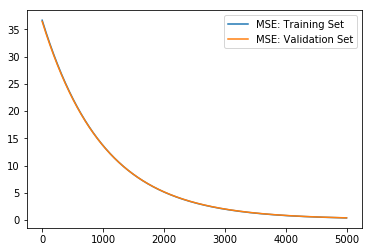

In [60]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-6

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training, mse_valid = [], []
    
    print("SCROLL DOWN FOR PLOT")
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        x_valid, y_valid = read_file('data/Dataset_2_valid.csv')
        mse_valid.append(computeLoss(w0, w1, x_valid, y_valid) * 2)
        print("MSE for Epoch #{}: {}".format(i+1, mse_valid[i]))
        
    
    print("Performance on Validation: {:f}".format(mse_valid[-1]))    
    # Plot data:
    plt.plot(range(len(mse_training)), mse_training)
    plt.plot(range(len(mse_valid)), mse_valid)
    plt.legend(['MSE: Training Set', 'MSE: Validation Set'])
    plt.show()


### Question 3-2: Testing chosen fit. (Stepsize 1.00E-02)
**Comparision Table in report**

In [87]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-2

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training = []
    
    epoch_snaps = 500
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        
    x,y = read_file('data/Dataset_2_test.csv')
    print("Model MSE (Test Set): {:f}".format(computeLoss(w0, w1, x, y)*2))
    


Model MSE (Test Set): 0.071703


### Question3-3: Visualizing Epochs

**Script found below, screen caps found in report.**

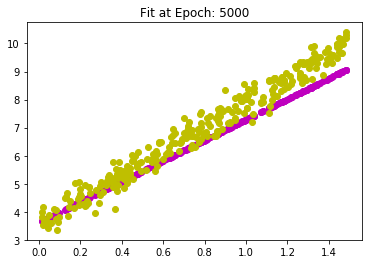

Model MSE (Test Set): 0.344107


In [100]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-6

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training = []
    
    epoch_snap = 4999
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        if i == epoch_snap:
            x_plot, y_comp = read_file('data/Dataset_2_train.csv')
            y_plot = [w0 + w1*x for x in x_plot]
            plt.plot(x_plot, y_plot, 'mo')
            plt.plot(x_plot, y_comp, 'yo')
            plt.title('Fit at Epoch: {:d}'.format(epoch_snap+1))
            plt.show()
        
    x,y = read_file('data/Dataset_2_test.csv')
    print("Model MSE (Test Set): {:f}".format(computeLoss(w0, w1, x, y)*2))
    
